# Notebook emulating plots from our WHAFT proposal

In [82]:
import xarray as xr
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

# import gcsfs
# from tqdm import tqdm
# import fsspec

xr.set_options(display_style="html");

### list the netcdf files

In [5]:
timepattern = '20161225*'

basedir = '/Users/dporter/Documents/Research/Projects/pangeo-AMPS/'
datadir = 'data/AMPS/WRF_24'
suffix = '.nc'
pattern = os.path.join(basedir, datadir, 'wrf-' + timepattern + suffix)
NCs = sorted(glob(pattern))  # , key=alphanum_key)

In [6]:
print(f"Total of {len(NCs)} wrf files.")
print(NCs[0])

Total of 8 wrf files.
/Users/dporter/Documents/Research/Projects/pangeo-AMPS/data/AMPS/WRF_24/wrf-2016122500_f003-cf.nc


In [9]:
ds = xr.open_mfdataset(NCs)

I am interested to know why the cell above fills the memory, when my intention was to only be loading things lazily. Note that when I load a smaller number of files (e.g., 45), instead of the full 55, I produce an xarray which seems to be made up of dask arrays as intended, so I dont why does it take up so much space on disk? Is it something to do with the chunking? increasing chunk size with AMPS.chunk doesnt seems to change the memory usage (monitored with top). 

In [10]:
ds

<xarray.Dataset>
Dimensions:   (pressure: 5, south_north: 825, time: 8, west_east: 537)
Coordinates:
  * time      (time) datetime64[ns] 2016-12-25T03:00:00 ... 2016-12-26
  * pressure  (pressure) float32 1000.0 850.0 700.0 500.0 300.0
    lat       (south_north, west_east) float32 dask.array<chunksize=(825, 537), meta=np.ndarray>
    lon       (south_north, west_east) float32 dask.array<chunksize=(825, 537), meta=np.ndarray>
Dimensions without coordinates: south_north, west_east
Data variables:
    DateTime  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    year      (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    month     (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    day       (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    hour      (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    minute    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    Z_sfc     (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    SST       (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    T_sfc     (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    p_sfc     (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    slp       (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    T_2m      (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    Td_2m     (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    r_v_2m    (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    q_2m      (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    rh_2m     (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    u_10m_tr  (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    v_10m_tr  (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ws_10m    (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    wd_10m    (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    precip_g  (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    Z_p       (time, pressure, south_north, west_east) float32 dask.array<chunksize=(1, 5, 825, 537), meta=np.ndarray>
    T_p       (time, pressure, south_north, west_east) float32 dask.array<chunksize=(1, 5, 825, 537), meta=np.ndarray>
    Td_p      (time, pressure, south_north, west_east) float32 dask.array<chunksize=(1, 5, 825, 537), meta=np.ndarray>
    r_v_p     (time, pressure, south_north, west_east) float32 dask.array<chunksize=(1, 5, 825, 537), meta=np.ndarray>
    q_p       (time, pressure, south_north, west_east) float32 dask.array<chunksize=(1, 5, 825, 537), meta=np.ndarray>
    SW_d      (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    LW_d      (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    LW_u      (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    LW_d_acc  (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    LW_u_acc  (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    albedo    (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    SH        (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    LH        (time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    SH_acc    (time, south_north, west_e

## Quick overview plot

In [ ]:
# plottime = 0

# if plottime == 0:
#     plottitle = 'hi'
#     plotdate = '23-Dec-2016 1800z'
# else:
#     plottitle = 'lo'
#     plotdate = '27-Dec-2016 1500z'
    

### Zoom in to Scott and Amundsen

same but take mean first...

### PLOT timeseries of 10m wind speeds 

In [75]:
print(ds.lon.shape)
print(ds.lat.shape)
print(ds['ws_10m'].isel(time=0).shape)

(825, 537)
(825, 537)
(825, 537)


### Get indices for Scott and Amundsen Glaciers

method 1 - mininmum distance search

method 2 - xarray labeled coordinates

In [76]:
scott = (-154.2, -85.3)
amundsen = (-159.6, -85.4)

In [79]:
# LAT = ds.lat.values[0]
# LON = ds.lon.values[0]

# a = abs( LAT - scott[1] ) + abs( LON - scott[0] )
# si,sj = np.unravel_index(a.argmin(), a.shape)

# a = abs( LAT - amundsen[1] ) + abs( LON - amundsen[0] )
# ai,aj = np.unravel_index(a.argmin(), a.shape)

In [80]:
def get_closest_AMPS_cell(file_for_latlon, lat, lon):
    """
    SSIA
    :param file_for_latlon:
    :param lat:
    :param lon:
    :return:
    """
    LAT = file_for_latlon.variables['lat'][:]
    LON = file_for_latlon.variables['lon'][:]
    a = abs(LON - lon) + abs(LAT - lat)
    iii, jjj = np.unravel_index(np.argmin(a.data), a.shape)
    return iii, jjj

si, sj = get_closest_AMPS_cell(ds, scott[1], scott[0])
ai, aj = get_closest_AMPS_cell(ds, amundsen[1], amundsen[0])

print(f"Closest AMPS gridcell for Scott Gl. is {ds['lat'].values[si, sj]:1.2f} N, {ds['lon'].values[si, sj]:1.2f} E")

Closest AMPS gridcell for Scott Gl. is -85.33 N, -154.17 E


In [81]:
# # rotate winds to earth-relative using the correct formulas
# ds['ue'] = ds['U10'] * ds['COSALPHA'] - ds['V10'] * ds['SINALPHA']
# ds['ve'] = ds['V10'] * ds['COSALPHA'] + ds['U10'] * ds['SINALPHA']

Crude method using indices

<xarray.DataArray 'ws_10m' ()>
dask.array<nanarg_agg-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 dask.array<chunksize=(), meta=np.ndarray>
    lon      float32 dask.array<chunksize=(), meta=np.ndarray>
2016-12-25T03:00:00.000000000
<xarray.DataArray 'ws_10m' ()>
dask.array<nanarg_agg-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 dask.array<chunksize=(), meta=np.ndarray>
    lon      float32 dask.array<chunksize=(), meta=np.ndarray>
2016-12-25T15:00:00.000000000


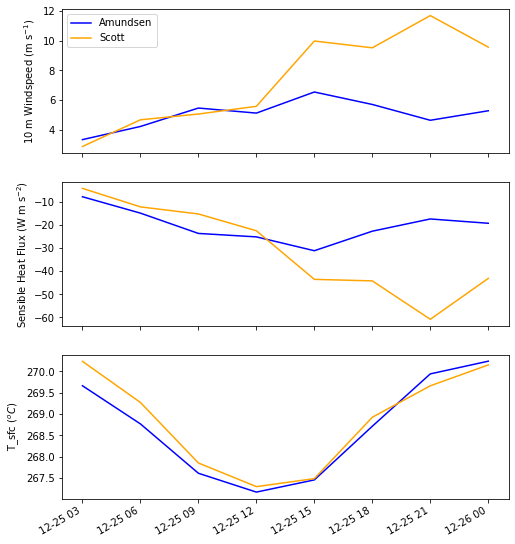

In [72]:
print(ds['ws_10m'].isel(south_north=si, west_east=sj).argmax())
print(ds['time'].values[0])
print(ds['ws_10m'].isel(south_north=si, west_east=sj).argmin())
print(ds['time'].values[4])

fig, axes = plt.subplots(3, 1, figsize=(8,10), sharex=True, sharey=False)
ln01 = axes[0].plot(ds['time'], ds['ws_10m'].isel(south_north=ai, west_east=aj), 
                    color='blue', label='Amundsen')
ln02 = axes[0].plot(ds['time'], ds['ws_10m'].isel(south_north=si, west_east=sj), 
                    color='orange', label='Scott')
ln11 = axes[1].plot(ds['time'], ds['SH'].isel(south_north=ai, west_east=aj), 
                   color='blue')
ln12 = axes[1].plot(ds['time'], ds['SH'].isel(south_north=si, west_east=sj), 
                   color='orange')
# ln13 = axes[1].plot(ds['time'], ds['LW_d'].isel(south_north=ai, west_east=aj), 
#                    color='blue')
# ln14 = axes[1].plot(ds['time'], ds['LW_d'].isel(south_north=si, west_east=sj), 
#                     color='orange')
ln21 = axes[2].plot(ds['time'], ds['T_sfc'].isel(south_north=ai, west_east=aj), 
                   color='blue')
ln21 = axes[2].plot(ds['time'], ds['T_sfc'].isel(south_north=si, west_east=sj), 
                    color='orange')

axes[0].set_ylabel('10 m Windspeed (m s$^{-1}$)')
axes[1].set_ylabel('Sensible Heat Flux (W / m s$^{-2}$)')
axes[2].set_ylabel('T_sfc ($^{o}C$)')
axes[0].legend()
# plt.xlim(pd.Timestamp('2017-02-10'), pd.Timestamp('2017-02-17'))
fig.autofmt_xdate()
# plt.savefig('figs/lineplot_WHAFT_ScottAmundsen_WS10_' + plottitle + '.pdf')

Better? method using la

### PLOT timeseries of other surface terms

### PLOT vertical profile of winds